In [1]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [12]:
bank=pd.read_csv("C:/Users/hussien/OneDrive/Desktop/bank.csv",sep=";")
bank.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no


In [14]:
bank.rename(columns = {'y':'depoist'}, inplace = True)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,depoist
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [16]:
##data_preprcessing
#Statistical Analysis

bank.describe()


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [18]:
#Checking Missing values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
depoist      0
dtype: int64

In [23]:
#Checking duplicate values
bank.duplicated().sum()
bank[bank.duplicated]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,depoist


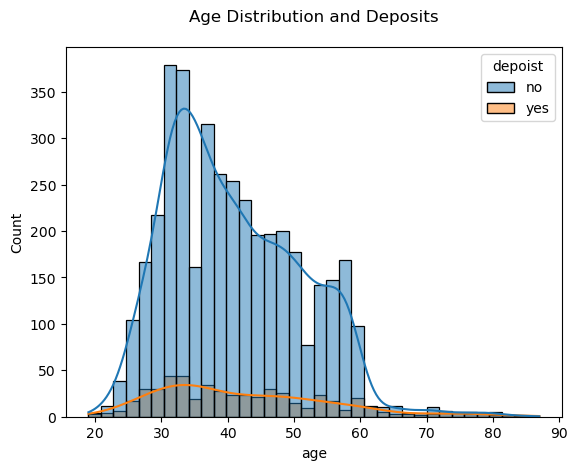

In [26]:
##EDA
##Age Distribution
sns.histplot(x="age", data=bank, kde=True, hue= "depoist")
plt.title("Age Distribution and Deposits\n")
plt.show()

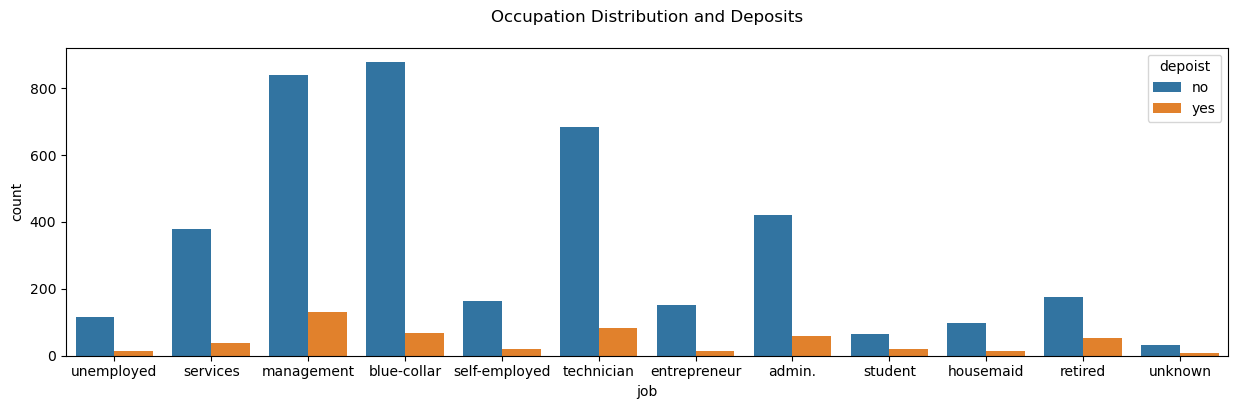

In [28]:
# Distribution of Occupation
plt.figure(figsize=(15,4))
sns.countplot(x="job", data= bank, hue ="depoist")
plt.title("Occupation Distribution and Deposits\n")
plt.show()

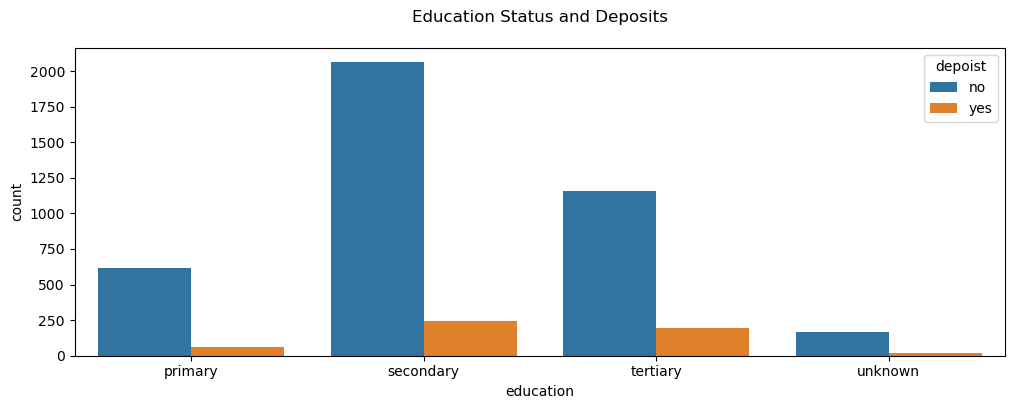

In [29]:
# Distribution of Education Status
plt.figure(figsize=(12,4))
sns.countplot(x="education", data= bank, hue ="depoist")
plt.title("Education Status and Deposits\n")
plt.show()

In [30]:
# Credit defaults - any ?
bank.default.value_counts()

no     4445
yes      76
Name: default, dtype: int64

In [ ]:
# Distribution of Housing Loan
plt.figure(figsize=(6,3.5))
sns.countplot(x="housing", data= bank, hue ="depoist")
plt.title("Housing Loan Distribution and Deposits\n")
plt.show()


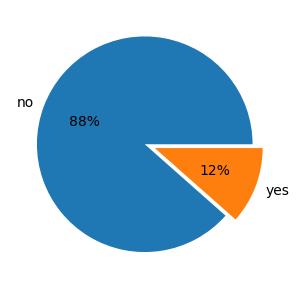

In [34]:
# Distribution of Outcome (Term Deposits)
#Count of Outcome
bank.depoist.value_counts()
keys = bank.depoist.value_counts().index
data = bank.depoist.value_counts().values
plt.figure(figsize=(6,3.5))
explode = [0,0.1]
plt.pie(data,labels=keys,explode=explode, autopct='%.0f%%')
plt.show()

In [35]:
# Label Encoding Categorical Features
cols = bank.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'depoist'],
      dtype='object')

In [36]:

le = LabelEncoder()

bank[cols] = bank[cols].apply(le.fit_transform)

In [37]:
bank.head(3)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,depoist
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0


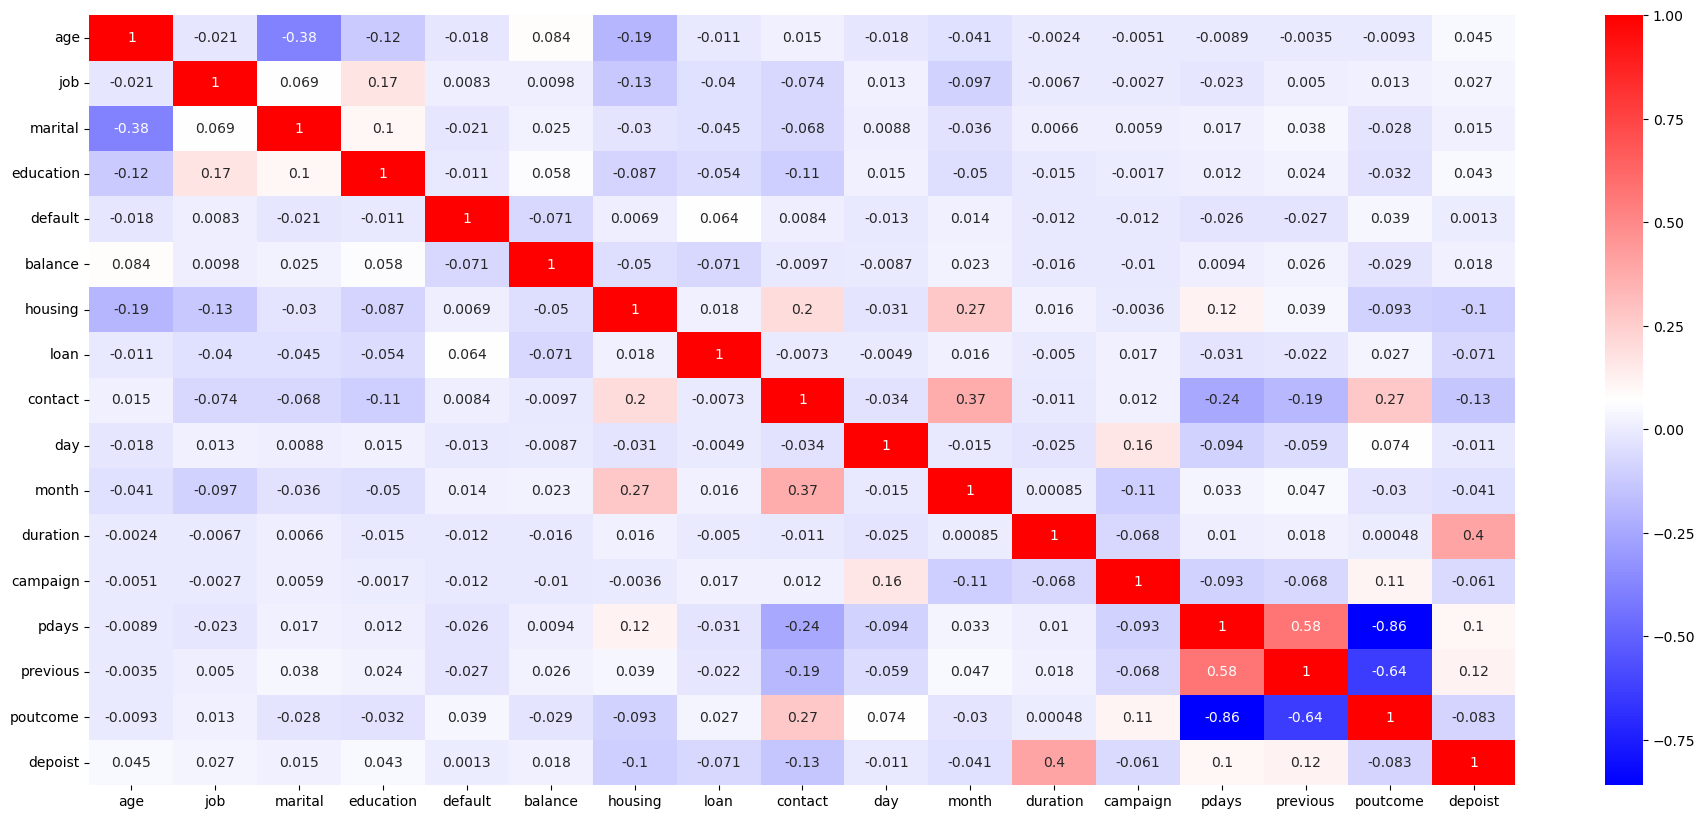

In [38]:
# Correlation Analysis using Heatmap

plt.figure(figsize=(23,10))
sns.heatmap(bank.corr(), cmap='bwr', annot=True)
plt.show()

In [40]:
# Standardisation
#Splitting input and output
X = bank.drop("depoist", axis=1)
y = bank.depoist

In [41]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [42]:
# Model building - Decision Tree Classifier
#Train-test split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

In [43]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [44]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))  
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))   

Train Score: 1.0
Test Score: 0.8680913780397936


In [45]:
cross_val_score(decision_tree, train_X, train_y, cv=5).mean()

0.8555622212890196

In [46]:
ypred = decision_tree.predict(test_X)
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1194
           1       0.46      0.52      0.48       163

    accuracy                           0.87      1357
   macro avg       0.69      0.72      0.70      1357
weighted avg       0.88      0.87      0.87      1357



In [47]:
# Hyperparameter tunning
#Applying Grid search cv to find best estimaters to improve model performance

param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

In [48]:
gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [49]:
gscv.best_params_


{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 7}

In [50]:
gscv.best_estimator_


DecisionTreeClassifier(max_depth=5, min_samples_leaf=7)

In [51]:
cross_val_score(gscv.best_estimator_, train_X, train_y, cv=5).mean() 


0.8960185574019638

In [52]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [53]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.9206700379266751
Test Score: 0.887988209285188


In [54]:
pred_y = clf.predict(test_X)


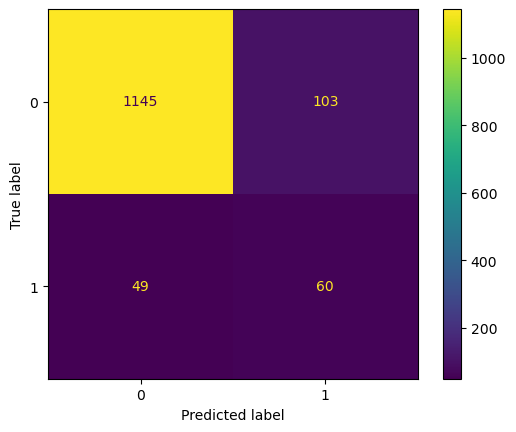

In [55]:
#Confusion Matrix
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()

In [56]:
#Classification Report
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1248
           1       0.37      0.55      0.44       109

    accuracy                           0.89      1357
   macro avg       0.66      0.73      0.69      1357
weighted avg       0.91      0.89      0.90      1357



In [57]:
#Accuracy Score
accuracy = accuracy_score(test_y,pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 88.7988209285188


In [64]:
#Cross Validation Score
Cross_val = cross_val_score(clf, test_X,test_y, cv=5).mean()     
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val*100)

Cross-Validation Accuracy Scores Decision Tree :  88.50390709789451


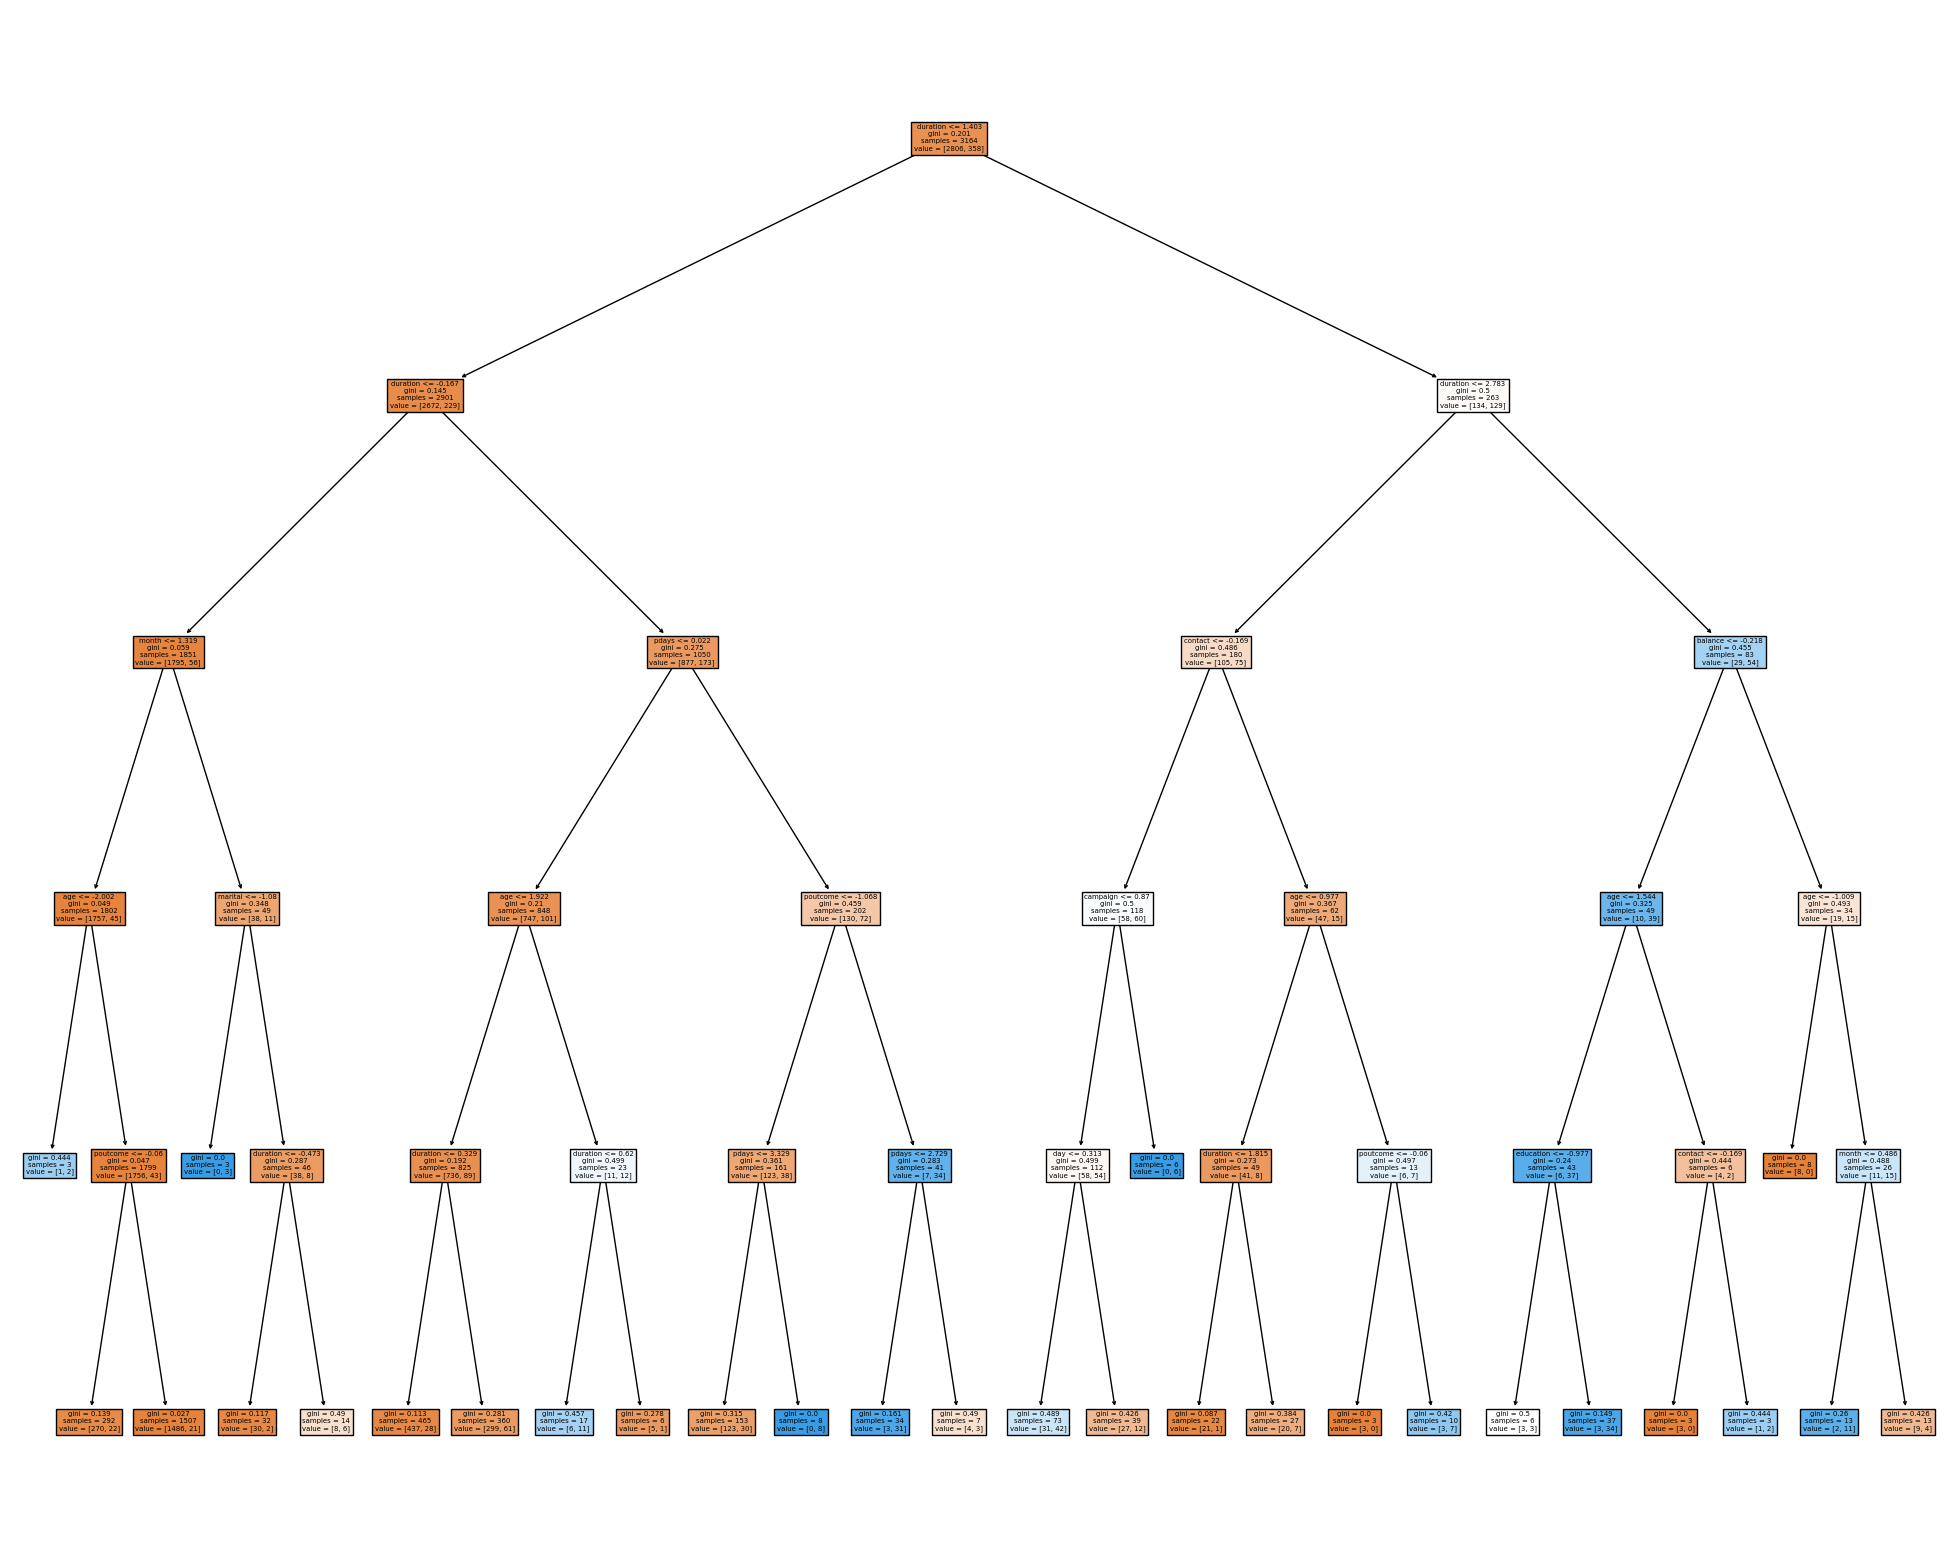

In [66]:
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming clf is your trained decision tree classifier and X is your feature matrix
fig = plt.figure(figsize=(25, 20))
t = tree.plot_tree(clf, filled=True, feature_names=X.columns.tolist())
plt.show()